In [281]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
img = cv2.imread("test.jpeg")
temp_img = img.copy()
gray_scale_img = cv2.cvtColor(temp_img, cv2.COLOR_BGR2GRAY)
gray_scale_img_np = np.asarray(gray_scale_img).astype(np.float64)
# gray_scale_img_np = np.asarray(
#     [[7, 3, 4, 8, 4, 9], [4, 1, 6, 9, 7, 3], [8, 8, 4, 10, 6, 4], [15, 2, 3, 4, 8, 7], [15, 2, 3, 4, 8, 16], [7, 3, 4, 8, 4, 9]])


In [283]:
def F(a, b):
    if a*b > 0:
        return "0"
    elif a*b <= 0:
        return "1"


In [284]:
def I(picture, h, w, theta):
    if (theta == 0):
        return picture[h,w] - picture[h,w+1]
    elif (theta == 45):
        return picture[h, w] - picture[h-1, w+1]
    elif (theta == 90):
        return picture[h, w] - picture[h-1, w]
    elif (theta == 135):
        return picture[h, w] - picture[h-1, w-1]


In [285]:
def ldp_pixel(picture, h, w):  # calculating local derivative pattern value of a pixel
    thirtytwo_bit_binary = []
    decimal_val = 0
    angles = [0, 45, 90, 135]

    for theta in angles:

        # starting from top left,assigning bit to pixels clockwise at theta degree
        thirtytwo_bit_binary.append(
            F(I(picture, h, w, theta), I(picture, h-1, w-1, theta)))

        thirtytwo_bit_binary.append(
            F(I(picture, h, w, theta), I(picture, h-1, w, theta)))

        thirtytwo_bit_binary.append(
            F(I(picture, h, w, theta), I(picture, h-1, w+1, theta)))

        thirtytwo_bit_binary.append(
            F(I(picture, h, w, theta), I(picture, h, w+1, theta)))

        thirtytwo_bit_binary.append(
            F(I(picture, h, w, theta), I(picture, h+1, w+1, theta)))

        thirtytwo_bit_binary.append(
            F(I(picture, h, w, theta), I(picture, h+1, w, theta)))

        thirtytwo_bit_binary.append(
            F(I(picture, h, w, theta), I(picture, h+1, w-1, theta)))

        thirtytwo_bit_binary.append(
            F(I(picture, h, w, theta), I(picture, h, w-1, theta)))

    # bits = ''.join(str(bit)
    #                for bit in thirtytwo_bit_binary)  # 32 bit binary number
    # decimal_val = int(bits, 2)  # 32 bit binary to decimal number

    str1 = ""
    l = str1.join(thirtytwo_bit_binary)  # 32 bit binary number
    decimal_val = int(l, 2)  # 32 bit binary to decimal number

    return decimal_val


In [286]:
def ldp_img(img):
    m, n = img.shape
    # converting image to grayscale
    # ldp_photo = np.zeros((m, n),np.uint8)
    ldp_img = np.zeros((m, n))
    # converting image to ldp
    for i in range(2, m-2):
        for j in range(2, n-2):
            ldp_img[i, j] = ldp_pixel(img, i, j)

    return ldp_img


In [287]:
ldp_paper = ldp_img(gray_scale_img_np)


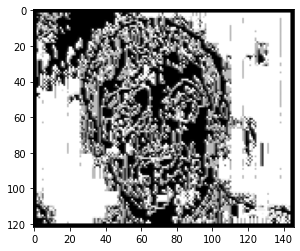

array([[0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 5.82028806e+08, ...,
        4.29496730e+09, 0.00000000e+00, 0.00000000e+00],
       ...,
       [0.00000000e+00, 0.00000000e+00, 3.37510080e+07, ...,
        4.29492609e+09, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00]])

In [288]:
ldp_paper
plt.imshow(ldp_paper, cmap="gray")
plt.show()
ldp_paper


(256,)

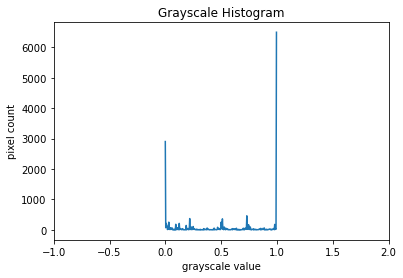

In [317]:
ldp_paper_norm = (ldp_paper - np.min(ldp_paper)) / \
    (np.max(ldp_paper) - np.min(ldp_paper))
histogram, bin_edges = np.histogram(ldp_paper_norm, bins=256, range=(0, 1))
plt.figure()
plt.title("Grayscale Histogram")
plt.xlabel("grayscale value")
plt.ylabel("pixel count")
plt.xlim([-1, 2.0])
plt.plot(bin_edges[0:-1], histogram)  # <- or here
histogram.shape


In [307]:
# assign bit according to degree and neighbouring pixel
def assign_bit(picture, x, y, c1, c2, d):
    # a and b are 1 if increasing and 0 if decreasing
    if (d == 0):
        a = 0
        b = 0
        try:
            if picture[c1][c2+1] >= picture[c1][c2]:
                a = 1
            if picture[x][y+1] >= picture[x][y]:
                b = 1
        except:
            pass
        
    if (d == 45):
        a = 0
        b = 0
        try:
            if picture[c1-1][c2+1] >= picture[c1][c2]:
                a = 1
            if picture[x-1][y+1] >= picture[x][y]:
                b = 1
        except:
            pass
    if (d == 90):
        a = 0
        b = 0
        try:
            if picture[c1-1][c2] >= picture[c1][c2]:
                a = 1
            if picture[x-1][y] >= picture[x][y]:
                b = 1
        except:
            pass
    if (d == 135):
        a = 0
        b = 0
        try:
            if picture[c1-1][c2-1] >= picture[c1][c2]:
                a = 1
            if picture[x-1][y-1] >= picture[x][y]:
                b = 1
        except:
            pass
    if (a == b):  # if monotonically increasing or decreasing than 0
        return "0"
    else:  # if turning point
        return "1"
    return bit


In [308]:
def local_der_val(picture, x, y):  # calculating local derivative pattern value of a pixel
    thirtytwo_bit_binary = []
    centre = picture[x][y]
    c1 = x
    c2 = y
    decimal_val = 0
    # starting from top left,assigning bit to pixels clockwise at 0 degree
    thirtytwo_bit_binary.append(assign_bit(picture, x-1, y-1, c1, c2, 0))
    thirtytwo_bit_binary.append(assign_bit(picture, x-1, y, c1, c2, 0))
    thirtytwo_bit_binary.append(assign_bit(picture, x-1, y + 1, c1, c2, 0))
    thirtytwo_bit_binary.append(assign_bit(picture, x, y + 1, c1, c2, 0))
    thirtytwo_bit_binary.append(
        assign_bit(picture, x + 1, y + 1, c1, c2, 0))
    thirtytwo_bit_binary.append(assign_bit(picture, x + 1, y, c1, c2, 0))
    thirtytwo_bit_binary.append(assign_bit(picture, x + 1, y-1, c1, c2, 0))
    thirtytwo_bit_binary.append(assign_bit(picture, x, y-1, c1, c2, 0))

    # starting from top left,assigning bit to pixels clockwise at 45 degree
    thirtytwo_bit_binary.append(assign_bit(picture, x-1, y-1, c1, c2, 45))
    thirtytwo_bit_binary.append(assign_bit(picture, x-1, y, c1, c2, 45))
    thirtytwo_bit_binary.append(
        assign_bit(picture, x-1, y + 1, c1, c2, 45))
    thirtytwo_bit_binary.append(assign_bit(picture, x, y + 1, c1, c2, 45))
    thirtytwo_bit_binary.append(assign_bit(
        picture, x + 1, y + 1, c1, c2, 45))
    thirtytwo_bit_binary.append(assign_bit(picture, x + 1, y, c1, c2, 45))
    thirtytwo_bit_binary.append(
        assign_bit(picture, x + 1, y-1, c1, c2, 45))
    thirtytwo_bit_binary.append(assign_bit(picture, x, y-1, c1, c2, 45))

    # starting from top left,assigning bit to pixels clockwise at 90 degree
    thirtytwo_bit_binary.append(assign_bit(picture, x-1, y-1, c1, c2, 90))
    thirtytwo_bit_binary.append(assign_bit(picture, x-1, y, c1, c2, 90))
    thirtytwo_bit_binary.append(
        assign_bit(picture, x-1, y + 1, c1, c2, 90))
    thirtytwo_bit_binary.append(assign_bit(picture, x, y + 1, c1, c2, 90))
    thirtytwo_bit_binary.append(assign_bit(
        picture, x + 1, y + 1, c1, c2, 90))
    thirtytwo_bit_binary.append(assign_bit(picture, x + 1, y, c1, c2, 90))
    thirtytwo_bit_binary.append(
        assign_bit(picture, x + 1, y-1, c1, c2, 90))
    thirtytwo_bit_binary.append(assign_bit(picture, x, y-1, c1, c2, 90))

    # starting from top left,assigning bit to pixels clockwise at 135 degree
    thirtytwo_bit_binary.append(assign_bit(picture, x-1, y-1, c1, c2, 135))
    thirtytwo_bit_binary.append(assign_bit(picture, x-1, y, c1, c2, 135))
    thirtytwo_bit_binary.append(
        assign_bit(picture, x-1, y + 1, c1, c2, 135))
    thirtytwo_bit_binary.append(assign_bit(picture, x, y + 1, c1, c2, 135))
    thirtytwo_bit_binary.append(assign_bit(
        picture, x + 1, y + 1, c1, c2, 135))
    thirtytwo_bit_binary.append(assign_bit(picture, x + 1, y, c1, c2, 135))
    thirtytwo_bit_binary.append(
        assign_bit(picture, x + 1, y-1, c1, c2, 135))
    thirtytwo_bit_binary.append(assign_bit(picture, x, y-1, c1, c2, 135))

    str1 = ""
    l = str1.join(thirtytwo_bit_binary)  # 32 bit binary number
    decimal_val = int(l, 2)  # 32 bit binary to decimal number
    return decimal_val


In [309]:


def ldp(gray_scale):
    m, n = gray_scale.shape
    # converting image to grayscale
    # ldp_photo = np.zeros((m, n),np.uint8)
    ldp_photo = np.zeros((m, n))
    # converting image to ldp
    for i in range(2, m-2):
        for j in range(2, n-2):
            ldp_photo[i, j] = local_der_val(gray_scale, i, j)

    return ldp_photo


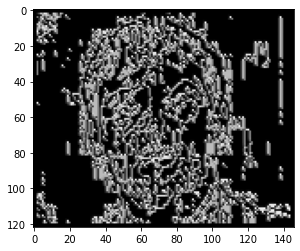

(122, 146)

In [312]:
l1 = ldp(gray_scale_img_np)
plt.imshow(l1, cmap ="gray") 
plt.show() 
l1.shape

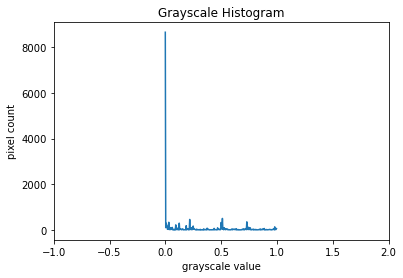

In [315]:
l1_norm = (l1 - np.min(l1)) / \
    (np.max(l1) - np.min(l1))
histogram_l1, bin_edges = np.histogram(l1_norm, bins=256, range=(0, 1))
plt.figure()
plt.title("Grayscale Histogram")
plt.xlabel("grayscale value")
plt.ylabel("pixel count")
plt.xlim([-1, 2.0])
plt.plot(bin_edges[0:-1], histogram_l1)  # <- or here


In [314]:
m, n = ldp_paper.shape
count = 0
for i in range(0, m):
    for j in range(0, n):
        if (l1[i, j] != ldp_paper[i, j]):
            count += 1
print(count)


11915


In [295]:
ldp_paper.shape

(122, 146)

In [296]:
l1.shape

(122, 146)